In [1]:
import sys
sys.path.insert(0, '/mnt/data/Eva/Simulation/SRKAnalysis/SRKAnalysis')
sys.path.insert(1, '/opt/root6/root-build/lib')
import srkglobal
import srkplotting as spl
import numpy as np

Welcome to JupyROOT 6.08/00


In [5]:
srkglobal.set_computer("work_desktop")
srkglobal.set_graphs_dir('/mnt/data/Eva/Simulation/work/graphs/vortrag/')
bid = 445
#base_phi = spl.make_tree_to_array(bid)[4]
#base_theta = spl.make_tree_to_array(bid)[5]
#baseB = spl.make_tree_to_array(bid)[6:]
#print baseB
time_arr = spl.make_timeline(bid)

osci_x = [spl.make_tree_to_array(bid+5),spl.make_tree_to_array(bid+6),spl.make_tree_to_array(bid+7)]
osci_z = [spl.make_tree_to_array(bid+9),spl.make_tree_to_array(bid+10),spl.make_tree_to_array(bid+11)]
spiral = [spl.make_tree_to_array(bid+13),spl.make_tree_to_array(bid+14),spl.make_tree_to_array(bid+15)]
#corresponds to [Bquad, Bsext, Bboth], within: [posx, posz, velx, velz, phi, theta, Bx, By, Bz]

In [3]:
B_osci_x = [spl.make_tree_to_array(bid+5)[6:],spl.make_tree_to_array(bid+6)[6:],spl.make_tree_to_array(bid+7)[6:]]
B_osci_z = [spl.make_tree_to_array(bid+9)[6:],spl.make_tree_to_array(bid+10)[6:],spl.make_tree_to_array(bid+11)[6:]]
B_spiral = [spl.make_tree_to_array(bid+13)[6:],spl.make_tree_to_array(bid+14)[6:],spl.make_tree_to_array(bid+15)[6:]]
B_osci_x = B_osci_x - baseB
B_osci_z = B_osci_z - baseB
B_spiral = B_spiral - baseB

In [26]:
for i in range(3):
    print "Mean: " + str(np.mean(B_spiral[0, i][1:-2]))
    print "Max: {}".format(np.max(B_spiral[0, i][1:-2]))
    print "Min: ", np.min(B_spiral[0, i][1:-2])

Mean: 1.49229146564e-06
Max: 0.0163676
Min:  -0.0163676
Mean: 0.0
Max: 0.0
Min:  0.0
Mean: -2.20559558518e-07
Max: 0.0163675999999
Min:  -0.0163676


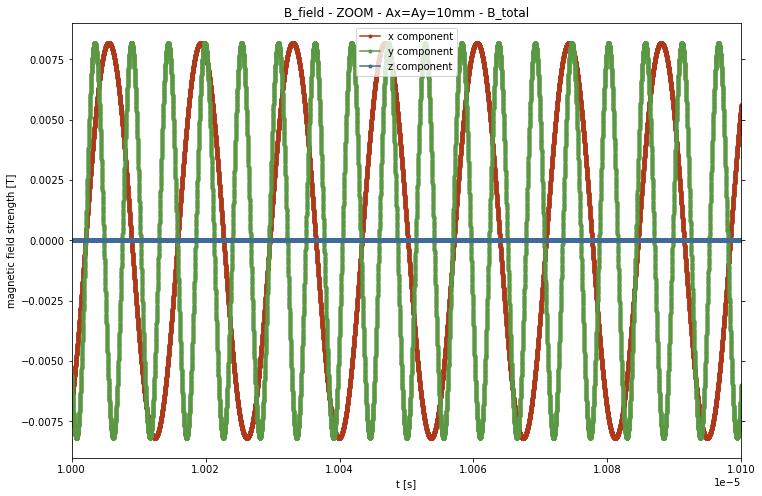

In [31]:
spl.plot_comparative('B_field - ZOOM - Ax=Ay=10mm - B_total', [B_spiral[2][0], B_spiral[2][2], B_spiral[2][1]], time_arr, 'both', 'magnetic field strength [T]', ['x component', 'y component', 'z component'], '.-', (1e-5, 1.01e-5))#, (-1e-5, 1e-5))


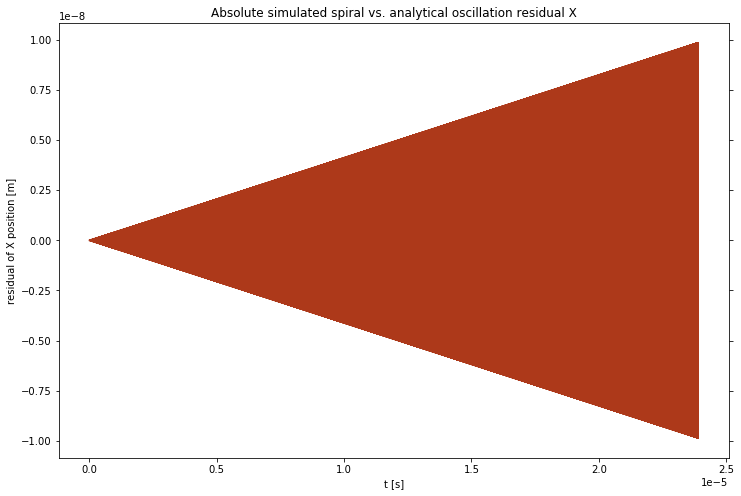

In [23]:
#check if position, velocity is influenced by fields, if not compare to analytical solution
#np.array_equal(osci_x[0][0], osci_x[1][0])
#np.array_equal(osci_x[0][0], osci_x[2][0])
#if not np.array_equal(osci_x[0][0], spiral[0][0]): print 'Difference between osci x and spiral'
#np.array_equal(spiral[0][0], spiral[1][0])
#np.array_equal(spiral[0][0], spiral[2][0])

#np.array_equal(osci_x[0][2], osci_x[1][2])
#np.array_equal(osci_x[0][2], osci_x[2][2])
#np.array_equal(osci_x[0][2], spiral[0][2])
#np.array_equal(spiral[0][2], spiral[1][2])
#np.array_equal(spiral[0][2], spiral[2][2])

#np.array_equal(osci_z[0][1], osci_z[1][1])
#np.array_equal(osci_z[0][1], osci_z[2][1])
#np.array_equal(osci_z[0][1], spiral[0][1])
#np.array_equal(spiral[0][1], spiral[1][1])
#np.array_equal(spiral[0][1], spiral[2][1])

#np.array_equal(osci_z[0][3], osci_z[1][3])
#np.array_equal(osci_z[0][3], osci_z[2][3])
#np.array_equal(osci_z[0][3], spiral[0][3])
#np.array_equal(spiral[0][3], spiral[1][3])
#np.array_equal(spiral[0][3], spiral[2][3])

#spl.plot_single('Horizontal vs. combined oscillation', osci_x[0][0]-spiral[0][0], time_arr, 'Position X')
#spl.plot_single('Vertical vs. combined oscillation', osci_z[0][1]-spiral[0][1], time_arr, 'Position Z')

x_analytical = 0.01*np.cos(1.1466e9*time_arr)
z_analytical = 0.01*np.cos(4.5685e8*time_arr)

#spl.plot_comparative('check osci x vs spiral', [osci_x[0][0][::100], x_analytical[::100]], time_arr[::100], 'Position X', ['osci_x','analytical'])

#spl.plot_single('Relative simulated horizontal vs. analytical oscillation residual', (osci_x[0][0]-x_analytical)/x_analytical, time_arr, 'both', 'relative residual of X position')
#spl.plot_single('Relative simulated vertical vs. analytical oscillation residual', (osci_z[0][1]-z_analytical)/z_analytical, time_arr, 'both', 'relative residual of Z position')
#spl.plot_single('Relative simulated spiral vs. analytical oscillation residual X', (spiral[0][0]-x_analytical)/x_analytical, time_arr, 'both', 'relative residual of X position')
#spl.plot_single('Relative simulated spiral vs. analytical oscillation residual Z', (spiral[0][1]-z_analytical)/z_analytical, time_arr, 'both', 'relative residual of Z position')

#spl.plot_single('Absolute simulated horizontal vs. analytical oscillation residual', (osci_x[0][0]-x_analytical), time_arr, 'both', 'residual of X position [m]')
#spl.plot_single('Absolute simulated vertical vs. analytical oscillation residual', (osci_z[0][1]-z_analytical), time_arr, 'both', 'residual of Z position[m]')
spl.plot_single('Absolute simulated spiral vs. analytical oscillation residual X', (spiral[0][0]-x_analytical), time_arr, 'both', 'residual of X position [m]')
#spl.plot_single('Absolute simulated spiral vs. analytical oscillation residual Z', (spiral[0][1]-z_analytical), time_arr, 'both', 'residual of Z position [m]')


In [ ]:
rel_phi = np.empty([3,3,len(time_arr)])
for i in range(3):
    rel_phi[0,i] = spl.delta_phi(osci_x[i][4], base_phi)
    rel_phi[1,i] = spl.delta_phi(osci_z[i][4], base_phi)
    rel_phi[2,i] = spl.delta_phi(spiral[i][4], base_phi)
    
abs_phi = np.empty([3,3,len(time_arr)])
for i in range(3):
    abs_phi[0,i] = spl.delta_phi(osci_x[i][4], base_phi, True)
    abs_phi[1,i] = spl.delta_phi(osci_z[i][4], base_phi, True)
    abs_phi[2,i] = spl.delta_phi(spiral[i][4], base_phi, True)
    
#[osci_x, osci_z, spiral], within [B_quad, B_sext, B_both]




In [ ]:
spl.plot_single('Relative residual phase - horizontal oscillation - B_quad', -1*rel_phi[0][0], time_arr, 'show', 'relative residual of phase', False, '.', False)
#waPr = -1.6021766208e-19 / (105.6583745e6 * 1.783e-36) * (0.00116592091 * 42.52309 + 28.3 * 1.4513)
#print waPr
#spl.plot_single('Relative residual phase - horizontal oscillation - B_quad', abs_phi[0][0][1:]/(waPr*time_arr[1:]), time_arr[1:], 'show', 'relative residual of phase', False, '.', False)
#spl.plot_single('Relative residual phase - horizontal oscillation - B_quad - ZOOM', rel_phi[0][0], time_arr, 'show', 'relative residual of phase', False, '.-', (15e-6, 15.02e-6), (-0.75e-7, 0.75e-7))
#spl.plot_single('Relative residual phase - horizontal oscillation - B_sext', rel_phi[0][1], time_arr, 'both', 'relative residual of phase', False, '.', False, (3.75e-7, 3.85e-7))
#spl.plot_single('Relative residual phase - horizontal oscillation - B_sext - ZOOM', rel_phi[0][1], time_arr, 'both', 'relative residual of phase', False, '.-', (15e-6, 15.02e-6), (3.79e-7, 3.792e-7))
#spl.plot_single('Relative residual phase - horizontal oscillation - B_total', rel_phi[0][2], time_arr, 'both', 'relative residual of phase', False, '.', False, (-0.4e-7, 8e-7))
#spl.plot_single('Relative residual phase - horizontal oscillation - B_total - ZOOM', rel_phi[0][2], time_arr, 'both', 'relative residual of phase', False, '.-', (15e-6, 15.02e-6), (2.5e-7, 5e-7))
#spl.plot_comparative('Relative residual phase - vertical oscillation - B_quad vs. B_total', [rel_phi[0][0], rel_phi[0][2]], time_arr, 'show', 'relative residual of phase', ['B_quad', 'B_total'], '.', False, (-5e-7, 7e-7))

#spl.plot_single('Relative residual phase - vertical oscillation - B_quad', rel_phi[1][0], time_arr, 'both', 'relative residual of phase', False, '.')
#spl.plot_single('Relative residual phase - vertical oscillation - B_sext', rel_phi[1][1], time_arr, 'both', 'relative residual of phase', False, '.', False, (-6.06e-8, -5.98e-8))
#spl.plot_single('Relative residual phase - vertical oscillation - B_sext - ZOOM', rel_phi[1][1], time_arr, 'both', 'relative residual of phase', False, '.-', (15e-6, 15.02e-6), (-6.024e-8, -6.018e-8))
#spl.plot_single('Relative residual phase - vertical oscillation - B_total', rel_phi[1][2], time_arr, 'show', 'relative residual of phase', False, '.', False, (-6.06e-8, -6e-8))
#spl.plot_comparative('Relative residual phase - vertical oscillation - B_sext vs B_total', [rel_phi[1][1], rel_phi[1][2]], time_arr, 'both', 'relative residual of phase', ['B_sext', 'B_total'], '.', False, (-6.06e-8, -6e-8))

#spl.plot_single('Relative residual phase - spiral - B_quad', rel_phi[2][0], time_arr, 'both', 'relative residual of phase', False, '.', False, (-1e-6, 1e-6))
#spl.plot_single('Relative residual phase - spiral - B_sext', rel_phi[2][1], time_arr, 'both', 'relative residual of phase', False, '.', False, (3.05e-7, 3.35e-7))
#spl.plot_single('Relative residual phase - spiral - B_total', rel_phi[2][2], time_arr, 'show', 'relative residual of phase', False, '.', False, (-1e-9, 1e-9))
#spl.plot_single('Relative residual phase - spiral - B_total - ZOOM', rel_phi[2][2], time_arr, 'show', 'relative residual of phase', False, '.-', (23.85e-6,23.9e-6), (-7.44e-6, -7.37e-6))
#spl.plot_comparative('Relative residual phase - spiral - B_quad vs. B_total', [rel_phi[2][0], rel_phi[2][2]], time_arr, 'show', 'relative residual of phase', ['B_quad', 'B_total'], '.', False, (-0.5e-6, 0.8e-6))

#spl.plot_single('Baseline phase', base_phi, time_arr, 'both', 'phase [rad]')
#spl.plot_comparative('Baseline phase', [base_phi, 3.49764e10*time_arr], time_arr, 'show', 'phase [rad]', ['Simulation', 'Analytical'])
#spl.plot_single('Baseline phase - ZOOM', base_phi, time_arr, 'both', 'phase [rad]', False, '.-', (15e-6,15.02e-6), (634,635))

#delta_base = 3.49764e10*time_arr - base_phi 
#spl.plot_single('Baseline residual phase', delta_base, time_arr, 'show', 'residual phase [rad]')

In [ ]:
spl.plot_single('Residual phase - horizontal oscillation - B_quad', abs_phi[0][0], time_arr, 'both', 'residual of phase [rad]', False, '.')
#spl.plot_single('Residual phase - horizontal oscillation - B_quad - ZOOM', abs_phi[0][0], time_arr, 'both', 'residual of phase [rad]', False, '.-', (15e-6,15.02e-6), (-5e-5, 5e-5))
#spl.plot_single('Residual phase - horizontal oscillation - B_sext', abs_phi[0][1], time_arr, 'both', 'residual of phase [rad]', False, '.', False, (-1e-4, 5e-4))
#spl.plot_single('Residual phase - horizontal oscillation - B_sext - ZOOM', abs_phi[0][1], time_arr, 'both', 'residual of phase [rad]', False, '.-', (15e-6, 15.01e-6), (2.397e-4, 2.4e-4))
#spl.plot_single('Residual phase - horizontal oscillation - B_total', abs_phi[0][2], time_arr, 'both', 'residual of phase [rad]', False, '.', False, (-1e-4, 5e-4))
#spl.plot_single('Residual phase - horizontal oscillation - B_total - ZOOM', abs_phi[0][2], time_arr, 'both', 'residual of phase [rad]', False, '.-', (15e-6,15.02e-6), (1e-4, 4e-4))

#spl.plot_single('Residual phase - vertical oscillation - B_quad', abs_phi[1][0], time_arr, 'both', 'residual of phase [rad]', False, '.')
#spl.plot_single('Residual phase - vertical oscillation - B_quad - ZOOM', abs_phi[1][0], time_arr, 'both', 'residual of phase [rad]', False, '.-', (15e-6,15.1e-6), (-1.41e-7, -1.39e-7))
#spl.plot_single('Residual phase - vertical oscillation - B_sext', abs_phi[1][1], time_arr, 'both', 'residual of phase [rad]', False, '.')
#spl.plot_single('Residual phase - vertical oscillation - B_sext - ZOOM', abs_phi[1][1], time_arr, 'both', 'residual of phase [rad]', False, '.-', (15e-6,15.02e-6), (-3.82e-5, -3.8e-5))
#spl.plot_single('Residual phase - vertical oscillation - B_total', abs_phi[1][2], time_arr, 'both', 'residual of phase [rad]', False, '.')
#spl.plot_comparative('Residual phase - vertical oscillation - B_sext vs. B_total', [abs_phi[1][1], abs_phi[1][2]], time_arr, 'show', 'residual of phase [rad]', ['B_sext', 'B_total'], '.', False, (-0.7e-4, 0.1e-4))

#spl.plot_single('Residual phase - spiral - B_quad', abs_phi[2][0], time_arr, 'both', 'residual of phase [rad]', False, '.', False, (-5e-4, 5e-4))
#spl.plot_single('Residual phase - spiral - B_sext', abs_phi[2][1], time_arr, 'both', 'residual of phase [rad]', False, '.')
#spl.plot_single('Residual phase - spiral - B_sext - ZOOM', abs_phi[2][1], time_arr, 'both', 'residual of phase [rad]', False, '.-', (15e-6,15.02e-6), (2.015e-4, 2.022e-4))
#spl.plot_single('Residual phase - spiral - B_total', abs_phi[2][2], time_arr, 'both', 'residual of phase [rad]', False, '.', False)


In [ ]:
#spl.plot_single('Frequency difference in CF - Ax=10mm - B_quad', abs_phi[0][0][1:]/time_arr[1:], time_arr[1:], 'both', r"$\delta \omega'$ [rad]", False, '.')
#spl.plot_single('Phase difference in Lab - Ax=10mm - B_sext', abs_phi[0][1]/29.3, time_arr*29.3, 'both', r'$\Delta \varphi$ [rad]', False, '.')
spl.plot_single('Frequency difference in CF - Ax=10mm - B_sext', abs_phi[0][1][1:]/time_arr[1:], time_arr[1:], 'both', r"$\delta \omega'$ [rad s$^{-1}$]", False, '.')
#spl.plot_single('Residual phase - horizontal oscillation - B_sext - ZOOM', abs_phi[0][1], time_arr, 'both', 'residual of phase [rad]', False, '.-', (15e-6, 15.01e-6), (2.397e-4, 2.4e-4))
#spl.plot_single('Residual phase - horizontal oscillation - B_total', abs_phi[0][2], time_arr, 'both', 'residual of phase [rad]', False, '.', False, (-1e-4, 5e-4))
#spl.plot_single('Residual phase - horizontal oscillation - B_total - ZOOM', abs_phi[0][2], time_arr, 'both', 'residual of phase [rad]', False, '.-', (15e-6,15.02e-6), (1e-4, 4e-4))

#spl.plot_single('Residual phase - vertical oscillation - B_quad', abs_phi[1][0], time_arr, 'both', 'residual of phase [rad]', False, '.')
#spl.plot_single('Residual phase - vertical oscillation - B_quad - ZOOM', abs_phi[1][0], time_arr, 'both', 'residual of phase [rad]', False, '.-', (15e-6,15.1e-6), (-1.41e-7, -1.39e-7))
#spl.plot_single('Residual phase - vertical oscillation - B_sext', abs_phi[1][1], time_arr, 'both', 'residual of phase [rad]', False, '.')
#spl.plot_single('Residual phase - vertical oscillation - B_sext - ZOOM', abs_phi[1][1], time_arr, 'both', 'residual of phase [rad]', False, '.-', (15e-6,15.02e-6), (-3.82e-5, -3.8e-5))
#spl.plot_single('Residual phase - vertical oscillation - B_total', abs_phi[1][2], time_arr, 'both', 'residual of phase [rad]', False, '.')
#spl.plot_comparative('Residual phase - vertical oscillation - B_sext vs. B_total', [abs_phi[1][1], abs_phi[1][2]], time_arr, 'show', 'residual of phase [rad]', ['B_sext', 'B_total'], '.', False, (-0.7e-4, 0.1e-4))

#spl.plot_single('Residual phase - spiral - B_quad', abs_phi[2][0], time_arr, 'both', 'residual of phase [rad]', False, '.', False, (-5e-4, 5e-4))
#spl.plot_single('Residual phase - spiral - B_sext', abs_phi[2][1], time_arr, 'both', 'residual of phase [rad]', False, '.')
#spl.plot_single('Residual phase - spiral - B_sext - ZOOM', abs_phi[2][1], time_arr, 'both', 'residual of phase [rad]', False, '.-', (15e-6,15.02e-6), (2.015e-4, 2.022e-4))
#spl.plot_single('Residual phase - spiral - B_total', abs_phi[2][2], time_arr, 'both', 'residual of phase [rad]', False, '.', False)


In [ ]:
#spl.plot_single('Relative frequency difference in CF - Ax=10mm - B_quad', -1*rel_phi[0][0], time_arr, 'both', r"$\delta \omega' \div \omega_{a,0}'$", False, '.', False)
wa = -1.6021766208e-19 / (105.6583745e6 * 1.783e-36) * 0.00116592091 * 1.4513
#spl.plot_single('Relative frequency difference in Lab - Ax=10mm - B_quad', abs_phi[0][0][1:]/(29.3*29.3*time_arr[1:]*wa), time_arr[1:], 'both', r"$\delta \omega \div \omega_{a,0}$", False, '.', False)

#spl.plot_single('Relative frequency difference in CF - Ax=10mm - B_sext', -1*rel_phi[0][1], time_arr, 'both', r"$\delta \omega' \div \omega_{a,0}'$", False, '.', False)
spl.plot_single('Relative frequency difference in Lab - Ax=10mm - B_sext', abs_phi[0][1][1:]/(29.3*29.3*time_arr[1:]*wa), time_arr[1:], 'both', r"$\delta \omega \div \omega_{a,0}$", False, '.', False)


In [ ]:
#relpars, relcovs = curve_fit(lin, time_arr[10000:], -1*rel_phi[0][1][10000:], [0, -2.7e-11])
relpars, relcovs = curve_fit(lin, time_arr[10000:]*29.3, abs_phi[0][1][10000:]/(29.3*29.3*time_arr[10000:]*wa), [0, -0.75e-9])
print relpars, relcovs

In [ ]:
#spl.plot_comparative('Relative frequency difference in CF - Ax=10mm - B_sext', [-1*rel_phi[0][1], lin(time_arr, 0, -2.61685512e-11)], time_arr, 'both', r"$\delta \omega' \div \omega_{a,0}'$", ['Simulation', 'Linear Fit, offset 2.61685512e-11'], '.-')
spl.plot_comparative('Relative frequency difference in Lab - Ax=10mm - B_sext', [abs_phi[0][1][1:]/(29.3*29.3*time_arr[1:]*wa), lin(time_arr[1:]*29.3, 0, -7.40773967e-10)], time_arr[1:]*29.3, 'both', r"$\delta \omega \div \omega_{a,0}$", ['Simulation', 'Linear Fit, offset -7.40773967e-10'], '.-')


In [ ]:
theta = np.empty([3,3,len(time_arr)])
for i in range(3):
    theta[0,i] = osci_x[i][5]
    theta[1,i] = osci_z[i][5]
    theta[2,i] = spiral[i][5]

In [ ]:
#spl.plot_single('Theta - horizontal oscillation - B_quad', theta[0][0], time_arr, 'show', 'theta [rad]', False, '.', False, (-1e-10, 1e-10))
#spl.plot_single('Theta - horizontal oscillation - B_sext', theta[0][1], time_arr, 'both', 'theta [rad]', False, '.', False, (-5e-6, 5e-6))
#spl.plot_single('Theta - horizontal oscillation - B_sext - ZOOM', theta[0][1], time_arr, 'both', 'theta [rad]', False, '.-', (15e-6, 15.3e-6), (-1e-6, 1e-6))
#spl.plot_single('Theta - horizontal oscillation - B_sext - ZOOMx2', theta[0][1], time_arr, 'both', 'theta [rad]', False, '.-', (15.045e-6, 15.055e-6), (-2e-7, 2e-7))
#spl.plot_single('Theta - horizontal oscillation - B_total', theta[0][2], time_arr, 'both', 'theta [rad]', False, '.', False, (-5e-6, 5e-6))
#spl.plot_single('Theta - horizontal oscillation - B_total - ZOOM', theta[0][2], time_arr, 'both', 'theta [rad]', False, '.-', (15e-6, 15.3e-6), (-1e-6, 1e-6))
#spl.plot_single('Theta - horizontal oscillation - B_total - ZOOMx2', theta[0][2], time_arr, 'both', 'theta [rad]', False, '.-', (15.045e-6, 15.055e-6), (-2e-7, 2e-7))

#spl.plot_single('Theta - vertical oscillation - B_quad', theta[1][0], time_arr, 'both', 'theta [rad]', False, '.', False, (-5e-4, 5e-4))
#spl.plot_single('Theta - vertical oscillation - B_quad - ZOOM', theta[1][0], time_arr, 'both', 'theta [rad]', False, '.', (15e-6, 15.3e-6), (-1e-4, 1e-4))
#spl.plot_single('Theta - vertical oscillation - B_sext', theta[1][1], time_arr, 'both', 'theta [rad]', False, '.', False, (-5e-7, 5e-7))
#spl.plot_single('Theta - vertical oscillation - B_sext - ZOOM', theta[1][1], time_arr, 'both', 'theta [rad]', False, '.-', (15e-6, 15.3e-6), (-1e-7, 1e-7))
#spl.plot_single('Theta - vertical oscillation - B_sext - ZOOMx2', theta[1][1], time_arr, 'both', 'theta [rad]', False, '.-', (15.12e-6, 15.14e-6), (-0.3e-7, 0.5e-7))
#spl.plot_single('Theta - vertical oscillation - B_total', theta[1][2], time_arr, 'both', 'theta [rad]', False, '.', False, (-5e-4, 5e-4))
#spl.plot_single('Theta - vertical oscillation - B_total - ZOOM', theta[1][2], time_arr, 'both', 'theta [rad]', False, '.', (15e-6, 15.3e-6), (-1e-4, 1e-4))

#spl.plot_single('Theta - spiral - B_quad', theta[2][0], time_arr, 'both', 'theta [rad]', False, '.', False, (-5e-4, 5e-4))
#spl.plot_single('Theta - spiral - B_quad - ZOOM', theta[2][0], time_arr, 'show', 'theta [rad]', False, '.', (15e-6, 15.3e-6), (-1e-4, 1e-4))
spl.plot_single('Theta - spiral - B_sext', theta[2][1], time_arr, 'both', 'theta [rad]', False, '.', False, (-5e-6, 5e-6))
#spl.plot_single('Theta - spiral - B_sext - ZOOM', theta[2][1], time_arr, 'show', 'theta [rad]', False, '.-', (15e-6, 15.3e-6), (-5e-7, 5e-7))
#spl.plot_single('Theta - spiral - B_sext - ZOOMx2', theta[2][1], time_arr, 'show', 'theta [rad]', False, '.-', (15.03e-6, 15.08e-6), (-4e-7, 4e-7))
#spl.plot_single('Theta - spiral - B_total', theta[2][2], time_arr, 'both', 'theta [rad]', False, '.', False, (-5e-4, 5e-4))
#spl.plot_single('Theta - spiral - B_total - ZOOM', theta[2][2], time_arr, 'show', 'theta [rad]', False, '.', (15e-6, 15.3e-6), (-1e-4, 1e-4))


In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def lin(xdata, slope, intercept):
    return slope*xdata + intercept

def lin_zero(xdata, slope):
    return slope*xdata

In [ ]:
params, cov = curve_fit(lin, time_arr, abs_phi[2][2], [12, 0])
print params

In [ ]:
pars, covs = curve_fit(lin_zero, time_arr*29.3, abs_phi[0][1]/29.3, [0.91517056/29.3])
print pars, covs

In [ ]:
fpars, fcovs = curve_fit(lin, time_arr[10000:], abs_phi[0][1][10000:]/time_arr[10000:], [0, 0.9])
print fpars, fcovs

In [ ]:
#spl.plot_comparative('Phase difference in Lab - Ax=10mm - B_sext', [abs_phi[0][1]/29.3, lin_zero(time_arr*29.3, 0.00106602)], time_arr*29.3, 'both', r'$\Delta \varphi$ [rad]', ['Simulation', 'Linear Fit, slope 0.00106602'], '.-', False)

spl.plot_comparative('Frequency difference in CF - Ax=10mm - B_sext', [abs_phi[0][1][1:]/time_arr[1:], lin(time_arr[1:], 0, 9.15171288e-01)], time_arr[1:], 'both', r"$\delta \omega'$ [rad s$^{-1}$]", ['Simulation', 'Linear Fit, offset 9.15171288e-01'], '.-')


In [ ]:
def sinus(t, A, w):
    return A*np.sin(w*t)
def sinus_dec(t, A, w):
    return (A/t)*np.sin(w*t)
#sinpars, sincovs = curve_fit(sinus, time_arr, abs_phi[0][0], [7.0773e-6, 1.1466e09])
#print sinpars, sincovs

In [ ]:
def combined_zero(t, A, w, s):
    return sinus(t, A, w) + lin_zero(t, s)
def combined(t, A, w, s, o):
    return sinus_dec(t, A, w) + lin(t, s, o)
#compars, comcovs = curve_fit(combined_zero, time_arr*29.3, abs_phi[0][0]/29.3, [7.0773e-6/29.3, 1.1466e09/29.3, 0])
#print compars, comcovs

In [ ]:
print cov
print covs

In [ ]:
old_base=spl.make_tree_to_array(17)[4]
old_total=spl.make_tree_to_array(32)
old_phi=spl.delta_phi(old_total[4], old_base, True)

In [ ]:
old_pars, old_covs = curve_fit(lin_zero, time_arr, old_phi, [12])
print old_pars, old_covs

In [ ]:
np.max(abs_phi[0][0])

In [ ]:
middle = ['Ax=10mm', 'Ay=10mm', 'Ax=Ay=10mm']
end = ['B_quad', 'B_sext', 'B_total']
for i in range(3):
    for j in range(3):
        cfphase_pars, cfphase_covs = curve_fit(combined_zero, time_arr, abs_phi[i][j], [abs_phi[i][j][-1]/23.9e-6])
        spl.plot_comparative('Phase difference in CF - '+middle[i]' - '+end[j], [abs_phi[i][j], lin_zero(time_arr, cfphase_pars[0])], time_arr, 'both', r'$\Delta \varphi$ [rad]', ['Simulation', 'Linear Fit, slope '+str(cfphase_pars[0])], '.-')
        
        lphase_pars, lphase_covs = curve_fit(lin_zero, time_arr*29.3, abs_phi[i][j]/29.3, [abs_phi[i][j][-1]/(29.3*29.3*23.9e-6)]
        spl.plot_comparative('Phase difference in Lab - '+middle[i]' - '+end[j], [abs_phi[i][j]/29.3, lin_zero(time_arr*29.3, lphase_pars[0])], time_arr*29.3, 'both', r'$\Delta \varphi$ [rad]', ['Simulation', 'Linear Fit, slope '+str(lphase_pars[0])], '.-')
        
        cgfreq_pars, cffreq_covs = curve_fit
                                             